# Summary

We demonstrated how to visualize the results of post hoc tests using a significance plot from the `scikit-posthocs` library. This type of visualization is an alternative to line and text annotations that are more common when showing statistical significance on plots in scientific publications.

# Dataset
We used the `iris` dataset. This dataset contains different measurements of lengths and widths of both sepal and petal from three classes of iris species. The total number of observations for this dataset is 50.

In [1]:
import statsmodels.api as sa

df = sa.datasets.get_rdataset('iris').data
df.columns = df.columns.str.replace('.', '_')
df.head()

<ipython-input-1-9b0c8d33cc70>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis

A boxplot was used to visualize the sepal width distribution of the three species. We also overlayed the points on top of the boxplots using a swarmplot.

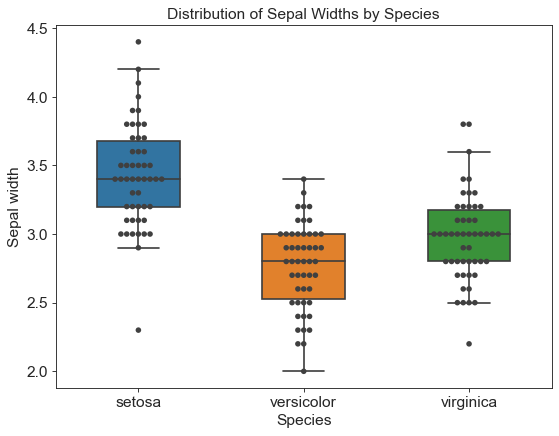

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("ticks")

plt.figure(figsize=(8, 6), dpi=80)

sns.boxplot(x='Species', y='Sepal_Width', data=df, showfliers=False, width=0.5)
sns.swarmplot(x='Species', y='Sepal_Width', data=df, color=".25")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal width', fontsize=14)
plt.title(f'Distribution of Sepal Widths by Species', fontsize=14)
plt.savefig('boxplot.png', dpi=80, bbox_inches = 'tight');

 We can see on the plot that the *setosa* species has generally the largest sepal widths among the three species, while *virginica* appear to have a slightly larger sepal widths than *versicolor*.

# Statistical Analysis


## ANOVA


To statistically compare the different sepal widths of the three iris species, we used analysis of variance or ANOVA for short using the `statsmodels` library. This package can be installed using pip: `pip install statsmodels`. 

In [3]:
import statsmodels.formula.api as sfa

lm = sfa.ols('Sepal_Width ~ C(Species)', data=df).fit()
anova = sa.stats.anova_lm(lm)

In [4]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Species),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


Results show that there is a significant difference between the species' sepal widths (p = 4.49e-17). However, these results do not tell us the exact pairs of species which are  statistically different. 

## Post Hoc Test

To determine which pairs of species have significant difference in terms of sepal width, we performed post hoc tests. We used the `scikit-posthocs` library to do this task. The `scikit-posthocs` is a Python library that provides various post hoc tests for pairwise multiple comparisons. You may install this package using the following command: `pip install scikit-posthocs`.

In [5]:
import scikit_posthocs as sp

post_hoc = sp.posthoc_conover(df, val_col='Sepal_Width', group_col='Species', \
                              p_adjust = 'holm')
post_hoc

,setosa,versicolor,virginica
setosa,1.000000e+00,2.278515e-18,1.293888e-10
versicolor,2.278515e-18,1.000000e+00,1.881294e-03
virginica,1.293888e-10,1.881294e-03,1.000000e+00


Based on the results of the post tests, we can see that there is significant difference in the mean sepal widths from all pairs of species.

# Significance Plot

Here, we plotted the post hoc results using the built-in function from `scikit-posthocs`, and put it side-by-side with the box plot. The significance plot is basically a binary heatmap that shows whether the pairs have statistically significant difference at various significance levels.

<ipython-input-6-0fe2a0aacdc4>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


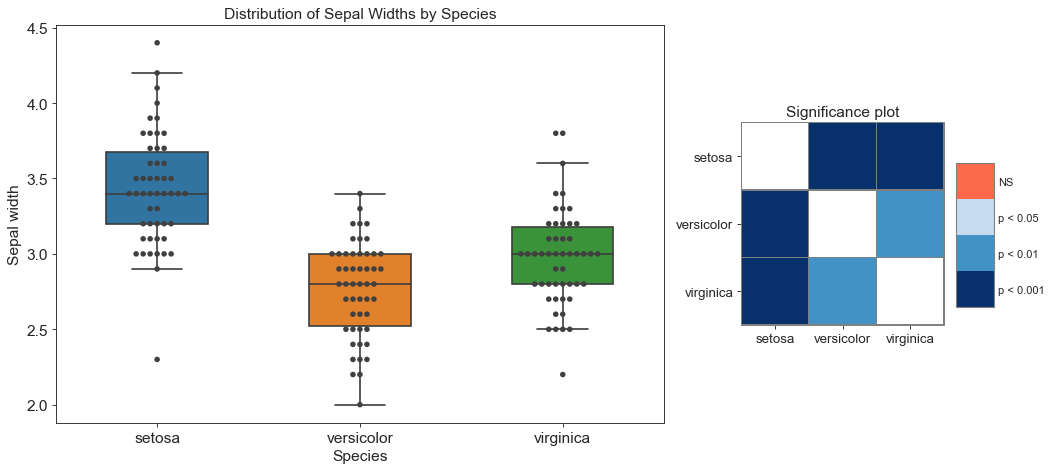

In [6]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("ticks")

plt.figure(figsize=(12, 6), dpi=80)
gs  = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# boxplot
ax0 = plt.subplot(gs[0])
ax0 = sns.boxplot(x='Species', y='Sepal_Width', data=df, showfliers=False, width=0.5)
ax0 = sns.swarmplot(x='Species', y='Sepal_Width', data=df, color=".25")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal width', fontsize=14)
plt.title(f'Distribution of Sepal Widths by Species', fontsize=14)

# significance plot
ax1 = plt.subplot(gs[1])

heatmap_args = {'cmap': ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef'], 
                'linewidths': 0.25, 
                'linecolor': '0.5', 
                'clip_on': False, 
                'square': True, 
                'cbar_ax_bbox': [1, 0.35, 0.04, 0.3],
               }

_ = sp.sign_plot(post_hoc, **heatmap_args)

ax1.set_title('Significance plot', fontsize=14)
ax1.set_yticklabels(ax0.get_xticklabels(), rotation=0, fontsize=12)
ax1.set_xticklabels(ax0.get_xticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig('boxplot-with-significance-plot.png', dpi=80, bbox_inches = 'tight')
plt.show()